In [6]:
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('loan_data.csv'
                )

In [8]:
df.head

<bound method NDFrame.head of        person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1          

In [9]:
df.shape

(45000, 14)

In [10]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [12]:
X=df[['person_income','loan_amnt', 'credit_score']]
y=df['loan_status']

In [13]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [15]:

from sklearn.ensemble import RandomForestClassifier

In [16]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size = 0.2, random_state = 42)
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8321111111111111

In [20]:
print(confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[[6582  408]
 [1103  907]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6990
           1       0.69      0.45      0.55      2010

    accuracy                           0.83      9000
   macro avg       0.77      0.70      0.72      9000
weighted avg       0.82      0.83      0.82      9000



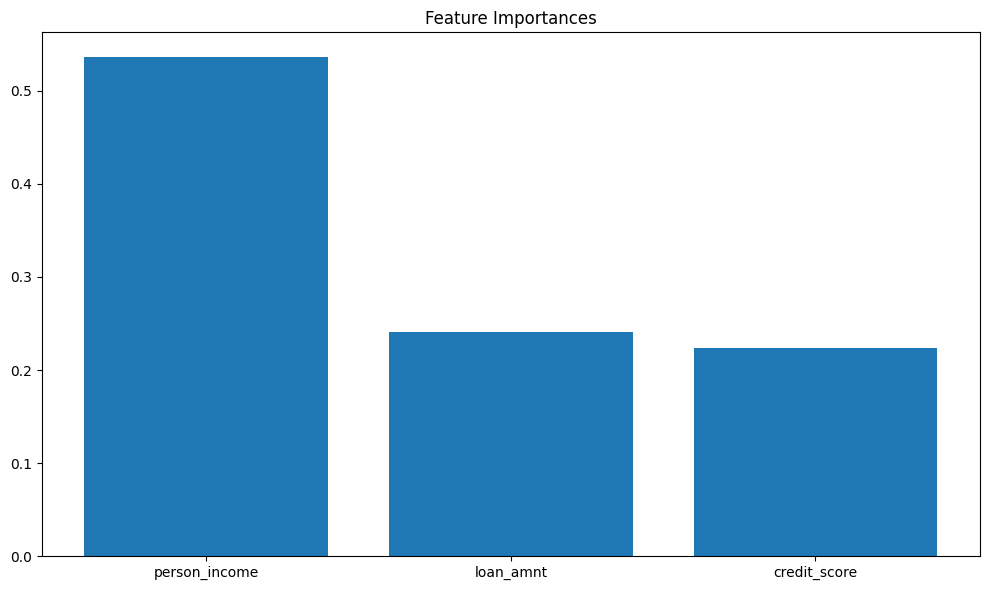

In [21]:
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns
plt.figure(figsize = (10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 0)
plt.tight_layout()
plt.show()